In [15]:
from astropy.coordinates import SkyCoord
from astroquery.sdss import SDSS
from astropy import units as u
coord = SkyCoord.from_name('J140404.9+005953.3')
xid = SDSS.query_region(coord,radius=5*u.arcsec,spectro=True)
spectra = SDSS.get_spectra(matches=xid)[0]
spec = spectra[1].data

Text(0, 0.5, 'Flux')

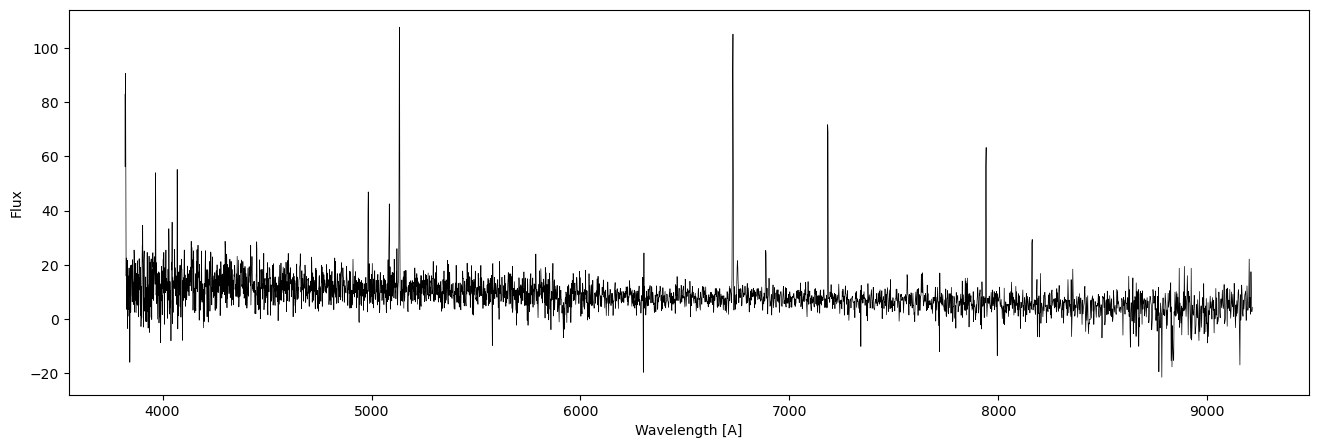

In [16]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(16,5))
ax.plot(10**spec['loglam'],spec['flux'],lw=0.5,color='k')
ax.set_xlabel('Wavelength [A]')
ax.set_ylabel('Flux')

In [52]:
import numpy as np
ind, = np.where((10**spec['loglam'] > 6600)&(10**spec['loglam'] < 7000))
wl_use = 10**spec['loglam'][ind]
fl_use = spec['flux'][ind]

Text(0, 0.5, 'Flux')

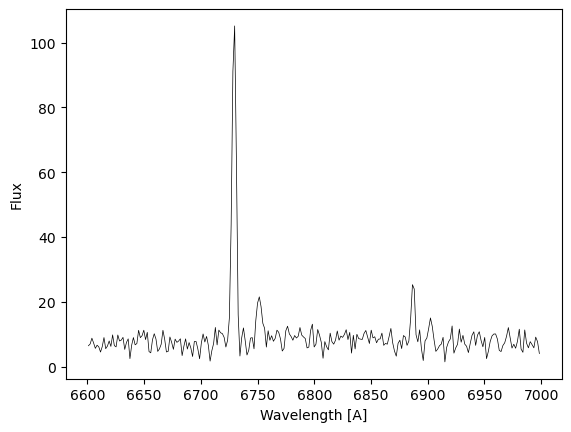

In [54]:
fig, ax = plt.subplots()
ax.plot(wl_use, fl_use, lw=0.5, color='k')
ax.set_xlabel('Wavelength [A]')
ax.set_ylabel('Flux')

In [87]:
def gauss(x, amp, loc, sigma):
    return amp * np.exp(-((x - loc)**2) / (2 * sigma**2))

In [95]:
from scipy.optimize import curve_fit
guess = [100, 6730, 0.25]
fit = curve_fit(f=gauss, xdata=wl_use, ydata=fl_use, p0=guess)
fit

(array([1.06988426e+02, 6.72926396e+03, 1.96860909e+00]),
 array([[ 5.05460269e+01, -3.26887369e-04, -6.20504685e-01],
        [-3.26887369e-04,  2.27985705e-02,  1.53704157e-05],
        [-6.20504685e-01,  1.53704157e-05,  2.28273627e-02]]))

In [97]:
xx = np.linspace(6600,7000,1000)

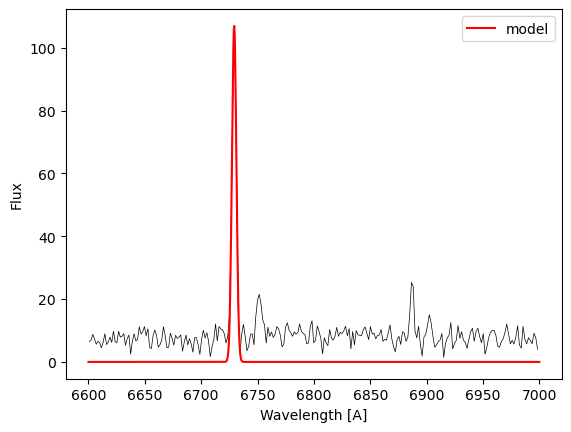

In [99]:
fig, ax = plt.subplots()
ax.plot(wl_use, fl_use, lw=0.5, color='k')

ax.set_xlabel('Wavelength [A]')
ax.set_ylabel('Flux')

params = fit[0]
ax.plot(xx, gauss(xx, *params), label='model', color='r')
ax.legend()